In [102]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use('lateky')

import numpy as np
import pickle

In [103]:
# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield(
    6,
    0,
    0.8875,
    0.2
)

In [107]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 2
pparams["nPpts"] = 300
pparams["zeta"] = 0

# Set RZs for the normal (R-only) computation
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 8

# Set up the Poincare plot object
pplot = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot.compute()

In [112]:
fig, ax = pplot.plot(marker=".", s=1)
# # plt.show()
# # fig.canvas.toolbar_visible = True
# fig.canvas.toolbar_visible = 'fade-in-fade-out'
# # fig.canvas.toolbar_position = 'top'
# fig.canvas.header_visible = False
# fig.canvas.footer_visible = True
# fig.canvas.resizable = False
# # fig.canvas.capture_scroll = True

# # fig.canvas.toolbar_visible = True
# display(fig)

In [5]:
pplot.compute_iota()

array([1.12676031, 1.12610116, 1.12417894, 1.12100646, 1.1166046 ,
       1.11100325, 1.10423806, 1.09635222, 1.08739652, 1.07742471,
       1.0664959 , 1.05467656, 1.04202922, 1.02862465, 1.01453351,
       0.99978765, 0.98454236, 0.96880427, 0.95265332, 0.93615381,
       0.91937009, 0.90236302, 0.88519053, 0.86790717, 0.85056285,
       0.83320303, 0.81587136, 0.7986089 , 0.78145187, 0.76443244,
       0.74757965, 0.7309196 , 0.71447536, 0.69826708, 0.68231262,
       0.66662748, 0.65122305, 0.63610924, 0.62129625, 0.6067891 ,
       0.59259198])

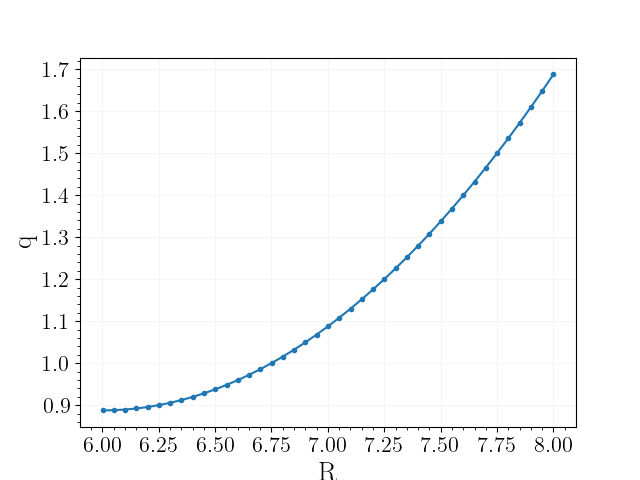

In [6]:
pplot.plot_q(marker=".")

### Straight field line coordinates

In [233]:
rho = 1.75
phis = np.linspace(0, 2*np.pi, 5)
thetas = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(thetas, phis)
# Flattening of the coordinates
# iota = 2/3
# X = Y*iota

coords = np.array([[6+rho*np.cos(theta), phi, rho*np.sin(theta)] for theta, phi in zip(X.flatten(), Y.flatten())])
Bs = pyoproblem.B_many(*coords.T)

In [234]:
coords = coords.reshape(X.shape + (3,))
Bs = Bs.reshape(X.shape + (3,))

In [237]:
Bphi = Bs[:,:,1]*(6+rho*np.cos(X))
Btheta = np.cos(X) * Bs[:,:,2] - np.sin(X) * Bs[:,:,0]

# Normalization
# norm = np.sqrt(Bphi**2 + Btheta**2)
# Bphi /= norm
# Btheta /= norm

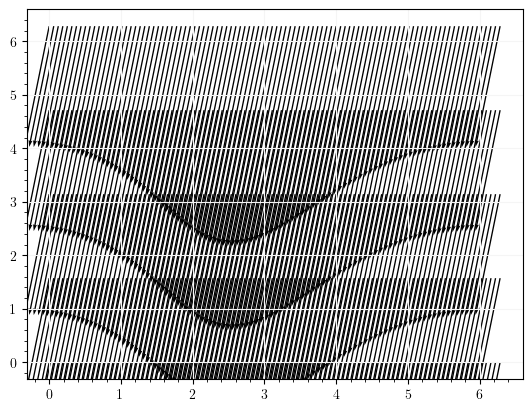

In [238]:
plt.ioff()
fig, ax = plt.subplots()
ax.quiver(X, Y, Btheta, Bphi, scale=1, scale_units='xy')
fig

#### Adding the perturbation

In [7]:
maxwellboltzmann = {"m": 3, "n": -2, "d": 1.75/np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}
pyoproblem.add_perturbation(maxwellboltzmann)

0 - dr : 0.0


In [8]:
pyoproblem.amplitudes = [1e-1]

0 - dr : 0.0


In [9]:
pyoproblem.perturbations_args

[{'m': 3,
  'n': -2,
  'd': 1.2374368670764582,
  'type': 'maxwell-boltzmann',
  'amplitude': 0.1,
  'R': 6,
  'Z': 0}]

In [10]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 15
pparams["nPpts"] = 150
pparams["zeta"] = 0

# Set RZs for the normal (R-only) computation
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 8.5

# Set up the Poincare plot object
pplot_perturbed = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot_perturbed.compute()

In [52]:
fig_perturbed.clear()

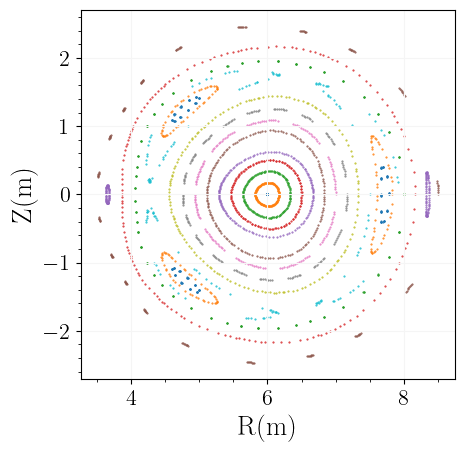

In [244]:
fig.clear()
fig, ax = pplot_perturbed.plot(marker=".", s=1)
fig

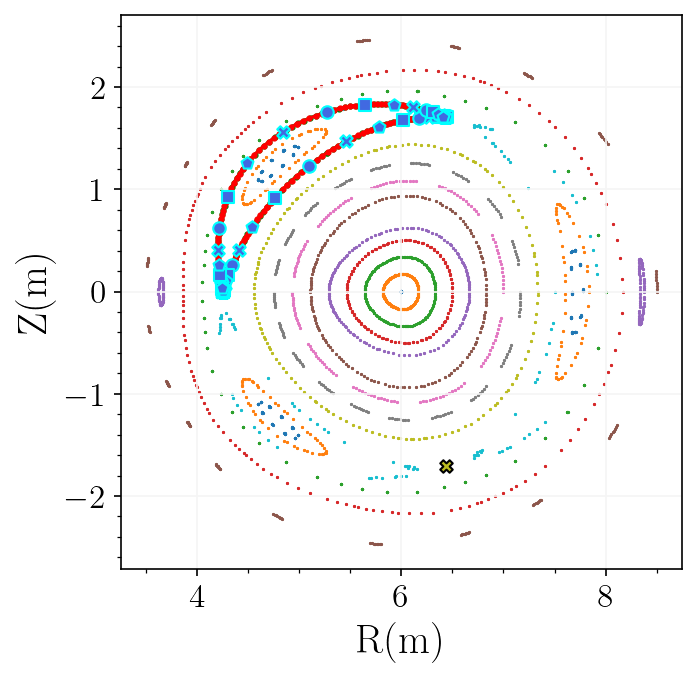

In [68]:
plt.ioff()
fig_perturbed, ax_perturbed = pplot_perturbed.plot(marker=".", s=1)
fig_perturbed

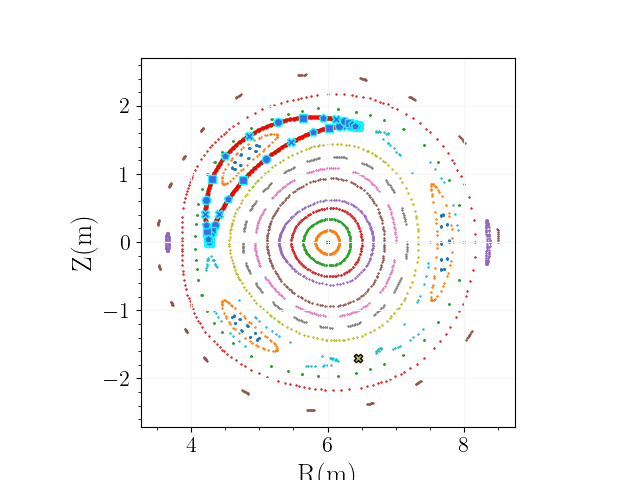

In [70]:
# pyoproblem.plot_intensities([4, 8], [-2, 2], ax=ax_perturbed, alpha=0.3)
display(fig_perturbed.canvas)

In [11]:
guess = [4.2, 0.]
# ax_perturbed.scatter(*guess)
# fig_perturbed

In [12]:
# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300
pparams['Z'] = 0

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
fixedpoint.compute(guess=guess, pp=2, qq=3, sbegin=2, send=10, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

[R,Z] : [4.231182461608909, 0.7243696603064351] - dtheta : -0.3886879336100808
R : 4.2672313458086135
[R,Z] : [4.292285982165341, -0.11460704118109455] - dtheta : 0.0670108943881278
R : 4.258557213354744
[R,Z] : [4.258843455343295, -0.0015552057510422827] - dtheta : 0.0008932024763197433
R : 4.258438345127808
[R,Z] : [4.258438404010944, -3.2074168027432237e-07] - dtheta : 1.8416896985229414e-07
R : 4.258438320608314
[R,Z] : [4.2584383206095255, -7.238654120556021e-14] - dtheta : -5.329070518200751e-15


In [17]:
pparams.pop("Z")
# set up the FixedPoint object
fp_x2 = FixedPoint(pyoproblem, pparams, integrator_params=iparams)
fp_x2.compute(guess=[6.44042536414122, 1.7065049712562115], pp=2, qq=3, sbegin=2, send=10, tol=1e-10)

0 - [DeltaR, DeltaZ] : [-6.42952358e-12  8.41549053e-14] - dtheta : 3.545830296047825e-12


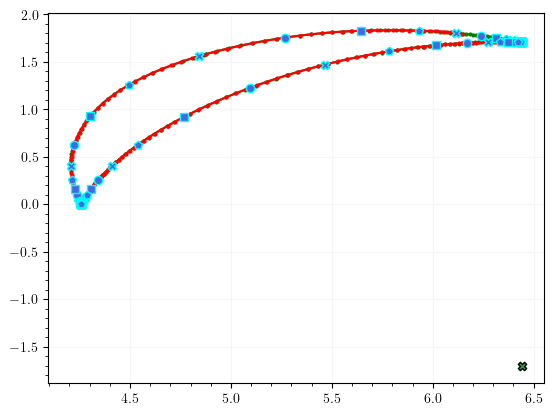

In [53]:
fig_perturbed

In [54]:
results
for rr in results:
    ax_perturbed.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

In [ ]:
ax_perturbed.set_title("Perturbed Poincare plot")
fig_perturbed

In [44]:
# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(pyoproblem, fixedpoint, fp_x2, integrator_params=iparams)

In [45]:
manifold.choose(signs=[[1, -1], [-1, 1]])

In [46]:
manifold.inner

{'lfs': {'stable': None, 'unstable': None},
 'clinics': [],
 'rfp_s': array([4.25843832, 0.        ]),
 'lambda_s': 0.15031839801923533,
 'vector_s': array([0.2411977, 0.970476 ]),
 'rfp_u': array([6.44042536, 1.70650497]),
 'lambda_u': 6.652545617774471,
 'vector_u': array([-0.99840307,  0.05649162])}

In [47]:
manifold.outer

{'lfs': {'stable': None, 'unstable': None},
 'clinics': [],
 'rfp_s': array([6.44042536, 1.70650497]),
 'lambda_s': 0.15031839801751068,
 'vector_s': array([-0.92453228,  0.38110375]),
 'rfp_u': array([4.25843832, 0.        ]),
 'lambda_u': 6.652545617706599,
 'vector_u': array([-0.2411977,  0.970476 ])}

In [48]:
manifold.compute(neps=30, nintersect=8)

2024-05-31 10:45:52 [info     ] Computing manifold for directions [inner/outer/both]: both
2024-05-31 10:45:55 [info     ] Search for minimum of the linear error succeeded, epsilon = 5.83924e-07
2024-05-31 10:45:57 [info     ] Search for minimum of the linear error succeeded, epsilon = 8.71721e-07
2024-05-31 10:45:57 [info     ] Computing unstable manifold...
2024-05-31 10:46:13 [info     ] Computing stable manifold...
2024-05-31 10:46:27 [info     ] Computing unstable manifold...
2024-05-31 10:46:41 [info     ] Computing stable manifold...


In [55]:
manifold.plot(ax=ax_perturbed)

(<Figure size 960x720 with 1 Axes>, <Axes: xlabel='R(m)', ylabel='Z(m)'>)

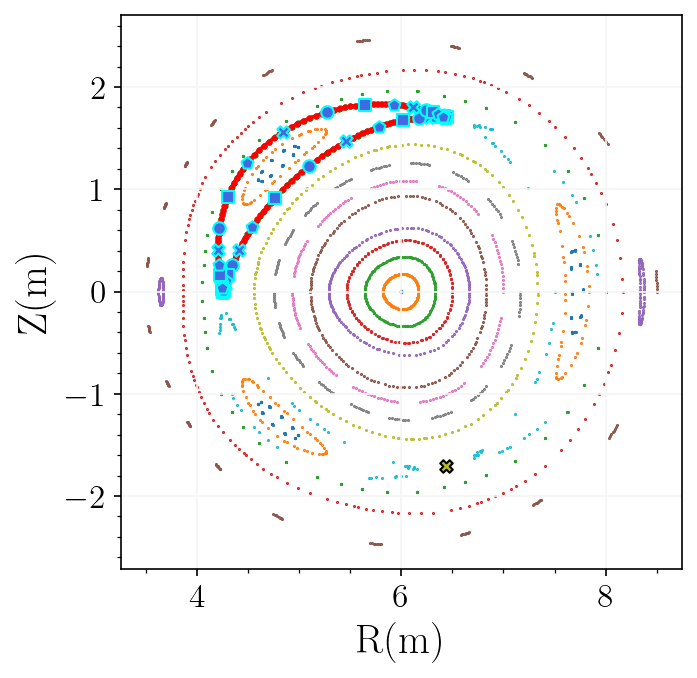

In [67]:
fig_perturbed

In [49]:
manifold.onworking = manifold.outer
manifold.find_clinics(n_points=4)

2024-05-31 10:47:03 [info     ] Search for minimum of the linear error succeeded, epsilon = 3.83120e-07
2024-05-31 10:47:05 [info     ] Search for minimum of the linear error succeeded, epsilon = 5.01355e-07
2024-05-31 10:47:06 [debug    ] Guess - 1.082764863463949e-06, 1.416955173204484e-06
2024-05-31 10:47:06 [debug    ] Bounds - ((3.831202715263538e-07, 2.548649998454252e-06), (5.013548220951489e-07, 3.335265168504117e-06))
2024-05-31 10:47:06 [debug    ] n_s, n_u - 8, 8
2024-05-31 10:47:06 [debug    ] Inside : (1.0827648634639495e-06, 1.4169551732044842e-06)
2024-05-31 10:47:07 [debug    ] Returns - (array([4.4369441 , 1.18121656]), array([5.42111849, 1.7961141 ]), array([-0.98417439, -0.61489754]))
2024-05-31 10:47:07 [debug    ] Inside : (1.0827648634639495e-06, 1.4169551732044842e-06)
2024-05-31 10:47:09 [debug    ] Returns - (array([4.4369441 , 1.18121656]), array([5.42111849, 1.7961141 ]), array([-0.98417439, -0.61489754]))
2024-05-31 10:47:09 [debug    ] Inside : (1.082764863

In [50]:
manifold.onworking = manifold.inner
manifold.find_clinics(n_points=4)

2024-05-31 10:48:19 [info     ] Search for minimum of the linear error succeeded, epsilon = 5.83924e-07
2024-05-31 10:48:23 [info     ] Search for minimum of the linear error succeeded, epsilon = 8.71721e-07
2024-05-31 10:48:23 [debug    ] Guess - 1.6503394920708842e-06, 2.4637274553422983e-06
2024-05-31 10:48:23 [debug    ] Bounds - ((5.839242229359702e-07, 3.8846032070777385e-06), (8.717205406493891e-07, 5.799175451333985e-06))
2024-05-31 10:48:23 [debug    ] n_s, n_u - 8, 7
2024-05-31 10:48:23 [debug    ] Inside : (1.6503394920708837e-06, 2.463727455342297e-06)
2024-05-31 10:48:24 [debug    ] Returns - (array([5.95041144, 1.66028624]), array([5.28682117, 1.36452137]), array([0.66359027, 0.29576488]))
2024-05-31 10:48:24 [debug    ] Inside : (1.6503394920708837e-06, 2.463727455342297e-06)
2024-05-31 10:48:25 [debug    ] Returns - (array([5.95041144, 1.66028624]), array([5.28682117, 1.36452137]), array([0.66359027, 0.29576488]))
2024-05-31 10:48:25 [debug    ] Inside : (1.650339492070

In [58]:
manifold.onworking = manifold.outer
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
confns = manifold.onworking["find_clinic_configuration"]
n_u = confns["n_u"]+confns["n_s"]+2

for i, clinic in enumerate(manifold.onworking["clinics"]):
    eps_s_i, eps_u_i = clinic[1:3]
    
    hu_i = manifold.integrate(manifold.onworking["rfp_u"] + eps_u_i * manifold.onworking["vector_u"], n_u, 1)
    ax_perturbed.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [59]:
manifold.onworking = manifold.inner
manifold.turnstile_area()

2024-05-31 10:53:42 [info     ] Forward integration goes beyond stable saddle point.
2024-05-31 10:53:42 [debug    ] rfp: [4.25843832 0.        ], rz_end: [ 4.25844621e+00 -3.02964260e-05], rz: [4.25844067e+00 1.39610572e-07]
2024-05-31 10:53:43 [info     ] Backward integration goes beyond stable saddle point.
2024-05-31 10:53:43 [debug    ] rfp: [6.44042536 1.70650497], rz_end: [6.44043613 1.70649984], rz: [6.44041429 1.70650492]
2024-05-31 10:53:43 [info     ] Potential integration completed for homo/hetero-clinic point of order : 1.955e-06
2024-05-31 10:53:45 [info     ] Forward integration goes beyond stable saddle point.
2024-05-31 10:53:45 [debug    ] rfp: [4.25843832 0.        ], rz_end: [ 4.25845425e+00 -6.31948385e-05], rz: [ 4.25844144e+00 -6.57461291e-06]
2024-05-31 10:53:45 [info     ] Backward integration goes beyond stable saddle point.
2024-05-31 10:53:45 [debug    ] rfp: [6.44042536 1.70650497], rz_end: [6.44043553 1.70650061], rz: [6.44042383 1.70650449]
2024-05-31 10:

array([ 0.00018618, -0.00021479,  0.00023037, -0.00020177])

In [60]:
manifold.onworking = manifold.outer
manifold.turnstile_area()

2024-05-31 10:53:52 [info     ] Forward integration goes beyond stable saddle point.
2024-05-31 10:53:52 [debug    ] rfp: [6.44042536 1.70650497], rz_end: [6.4404136  1.70650584], rz: [6.44041995 1.7065066 ]
2024-05-31 10:53:53 [info     ] Backward integration goes beyond stable saddle point.
2024-05-31 10:53:53 [debug    ] rfp: [4.25843832 0.        ], rz_end: [4.25844057e+00 1.04868855e-05], rz: [4.25843749e+00 6.28014032e-06]
2024-05-31 10:53:53 [info     ] Potential integration completed for homo/hetero-clinic point of order : 7.454e-07
2024-05-31 10:53:54 [info     ] Forward integration goes beyond stable saddle point.
2024-05-31 10:53:54 [debug    ] rfp: [6.44042536 1.70650497], rz_end: [6.4403814  1.70650758], rz: [6.4404165  1.70650629]
2024-05-31 10:53:56 [info     ] Backward integration goes beyond stable saddle point.
2024-05-31 10:53:56 [debug    ] rfp: [4.25843832 0.        ], rz_end: [4.25844297e+00 1.90578762e-05], rz: [4.25843874e+00 3.99472710e-06]
2024-05-31 10:53:56 

array([-0.00151051,  0.00146797, -0.00146023,  0.00147949])

In [61]:
manifold.inner["areas"]

array([[ 1.86184471e-04,  1.95640796e-04,  3.33489299e-05],
       [-2.14786881e-04,  3.91224113e-05,  4.74737648e-06],
       [ 2.30370480e-04,  6.03197847e-05,  1.08312190e-05],
       [-2.01768070e-04,  9.62042316e-05,  1.77703474e-05]])

In [62]:
manifold.outer["areas"]

array([[-1.51051348e-03,  4.25270157e-05,  3.82804411e-05],
       [ 1.46797052e-03,  2.32839121e-05,  4.25494055e-06],
       [-1.46023360e-03,  1.10373598e-04,  1.19929329e-05],
       [ 1.47949269e-03,  4.45633776e-05,  7.25857246e-06]])

In [63]:
inner_areas = manifold.inner["areas"][:,0]
outer_areas = manifold.outer["areas"][:,0]

In [64]:
inner_areas.sum(), outer_areas.sum()

(0.0, -2.3283866624979055e-05)

In [77]:
import pandas as pd

data = [
    {"type": "inner", "area": inner_areas[inner_areas > 0].sum(), "Error_by_diff": manifold.inner["areas"][:, 1][inner_areas > 0].sum(), "Error_by_estim": manifold.inner["areas"][:, 2][inner_areas > 0].sum(), "total_sum": inner_areas.sum()},
    {"type": "outer", "area": outer_areas[outer_areas > 0].sum(), "Error_by_diff": manifold.outer["areas"][:, 1][outer_areas > 0].sum(), "Error_by_estim": manifold.outer["areas"][:, 2][outer_areas > 0].sum(), "total_sum": outer_areas.sum()},
]

df = pd.DataFrame(data)

In [78]:
df

,type,area,Error_by_diff,Error_by_estim,total_sum
0,inner,0.000417,0.000256,0.000044,0.000000
1,outer,0.002947,0.000068,0.000012,-0.000023


In [65]:
outer_areas[outer_areas > 0].sum()

0.002947463209579837

In [66]:
inner_areas[inner_areas > 0].sum()

0.00041655495130044073

In [50]:
potential_integrations = manifold.inner["potential_integrations"]
fwd = np.min([len(pot[0]) for pot in potential_integrations])
bwd = np.min([len(pot[1]) for pot in potential_integrations])
inner_int = [pot[1][:fwd].sum() - pot[0][:bwd].sum() for pot in potential_integrations]
print(inner_int)
inner_int = np.mean(inner_int)

[-130.43988378484758, -130.44006997739356, -130.439855185253, -130.44008555370243]


In [49]:
potential_integrations = manifold.outer["potential_integrations"]
fwd = np.min([len(pot[0]) for pot in potential_integrations])
bwd = np.min([len(pot[1]) for pot in potential_integrations])
outer_int = [pot[1][:fwd].sum() - pot[0][:bwd].sum() for pot in potential_integrations]
print(outer_int)
outer_int = np.mean(outer_int)

[-169.5720692661551, -169.5705587526776, -169.57205000706006, -169.57058977346134]


In [52]:
outer_int - inner_int

-39.13134332453939

In [ ]:
manifold.find_homoclinic(9.690951179619085e-07, 4.6186933097797397e-07)

In [ ]:
manifold.find_clinics(n_points = 6)

In [ ]:
fund = manifold.fundamental_segment

In [ ]:
length = np.array([si[1]-si[0] for si in fund])

In [ ]:
length*np.power(manifold.lambda_u, 28)

In [ ]:
manifold.find_clinics(n_points=4)

In [25]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.onworking["clinics"]):
    eps_s_i, eps_u_i = clinic[1:3]

    n_u = 16
    
    # hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.onworking["rfp_u"] + eps_u_i * manifold.onworking["vector_u"], n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10)
    ax_perturbed.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [ ]:
rz = manifold.clinics[0][-1]

cont = True
while cont:
    rz = manifold.integrate_single(rz, 1, -1, ret_jacobian=False)
    if np.linalg.norm(rz - manifold.rfp_u) > length:
        cont = False
    length = np.linalg.norm(rz - manifold.rfp_u) 

In [ ]:
manifold.integrate_single(manifold.rfp_u + manifold.clinics[0][0]*manifold.vector_u, 11, -1, ret_jacobian=False)

In [ ]:
manifold.rfp_u

In [ ]:
fig_perturbed.set_size_inches(12, 12)
# ax_perturbed.set_xlim(4.4, 6.8)
# ax_perturbed.set_ylim(-0.3, 1.4)
ax_perturbed.legend()
display(fig_perturbed.canvas)

In [ ]:
areas, potential_integrations, history = manifold.resonance_area()

In [ ]:
fwd = np.min([len(pot[0]) for pot in potential_integrations])
bwd = np.min([len(pot[1]) for pot in potential_integrations])

In [ ]:
[pot[1][:fwd].sum() - pot[0][:bwd].sum() for pot in potential_integrations]

In [ ]:
manifold.areas

In [ ]:
areas = manifold.areas[:,0]

In [ ]:
areas[areas > 0].sum()

In [ ]:
areas.sum()

In [ ]:
np.isclose(areas.sum(), 0, atol=1e-2*np.abs(areas).max())

In [ ]:
eps_s_lb = manifold.find_epsilon(manifold.rfp_s, manifold.vector_s, direction=-1)
eps_u_lb = manifold.find_epsilon(manifold.rfp_u, manifold.vector_u)

In [ ]:
bounds = manifold.find_bounds(eps_s_lb, eps_u_lb)

In [ ]:
n_s, n_u = manifold.find_N(eps_s_lb, eps_u_lb)
print(n_s, n_u)

In [ ]:
space_u = np.logspace(
            np.log(bounds[1][0]) / np.log(manifold.lambda_u),
            np.log(bounds[1][1]) / np.log(manifold.lambda_u),
            20,
            base=manifold.lambda_u,
        )

space_s = np.logspace(
            np.log(bounds[0][0]) / np.log(manifold.lambda_s),
            np.log(bounds[0][1]) / np.log(manifold.lambda_s),
            20,
            base=manifold.lambda_s,
        )

In [ ]:
n_s, n_u = 16, 16
def evolution(self, eps):
    print(eps)
    eps_s, eps_u = eps
    r_s = self.rfp_s + eps_s * self.vector_s
    r_u = self.rfp_u + eps_u * self.vector_u

    try:
        r_s_evolved = self.integrate_single(r_s, n_s, -1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in stable manifold integration : {e}")

    try:
        r_u_evolved = self.integrate_single(r_u, n_u, 1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in unstable manifold integration : {e}")

    return r_s_evolved - r_u_evolved

es, eu = np.meshgrid(space_s, space_u)
E = np.array([evolution(manifold, [S, U]) for S, U in zip(es.flatten(), eu.flatten())]).reshape(es.shape + (2,))

In [ ]:
N = np.linalg.norm(E, axis=2)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot()
contour = ax.contourf(es, eu, N)
plt.colorbar(contour)

# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(es, eu, N, cmap='viridis')

In [ ]:
n_s = 17
n_u = 16

def iteration(eps_u):
    r_s_E, intA = manifold.integrate_single(manifold.rfp_u + eps_u * manifold.vector_u, n_s+n_u-1, 1, ret_jacobian=False, integrate_A=True)
    ax.scatter(*r_s_E, s=15, edgecolor='black', zorder=10)
    # r_dir = r_s_E - manifold.rfp_s
    # r_dir = r_dir / np.linalg.norm(r_dir)
    return intA

In [ ]:
space = np.linspace(bounds[1][0], bounds[1][1], 100)

In [ ]:
arr = []
for eps in space:
    arr.append(iteration(eps))

In [ ]:
fig, ax = plt.subplots()
ax.plot(space, arr)

In [ ]:
# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

In [ ]:
manifold.choose(0, 1, directions=["s","u"], sngs=[1, -1])

In [ ]:
manifold.compute(epsilon = 1e-6, neps=100, nintersect=8)

In [ ]:
manfiold.